# ML Model for Predicting Ships Crew Size
#### The excercise comes from this web-page: https://pub.towardsai.net/jupyter-notebook-for-data-science-coding-exercise-393d66ef353a
#### Forked from: https://github.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size 


## Introduction

The take-home challenge problem or coding exercise is the most important step in the data scientist interview process. This is generally a data science problem e.g., machine learning model, linear regression, classification problem, time series analysis, etc. Some coding challenge problems would specify that a formal project report is submitted together with a Jupyter notebook or R Script file. In this article, we present a sample Jupyter notebook for a take-home challenge problem.

## Project Instructions

This coding exercise should be performed in python (which is the programming language used by the team). You are free to use the internet and any other libraries. Please save your work in a Jupyter notebook and email it to us for review.

Data file: cruise_ship_info.csv (this file will be emailed to you)

Objective: Build a regressor that recommends the “crew” size for potential ship buyers. Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)

1. Read the file and display columns.

2. Calculate basic statistics of the data (count, mean, std, etc.) and examine data and state your observations.

3. Select columns that will probably be important to predict “crew” size.

4. If you removed columns, explain why you removed those.

5. Use one-hot encoding for categorical features.

6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

7. Build a machine learning model to predict the ‘crew’ size.

8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.

10. What is regularization? What is the regularization parameter in your model?

Plot regularization parameter value vs. Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

## Project Solution
1. Read the file and display the columns

In [29]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib widget

In [30]:
cruise = pd.read_csv('cruise_ship_info.csv')

In [31]:
# Displaying column names
print(cruise.columns)
# Display head of the df
cruise.head()

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


2. Calculate basic statistics of the data (count, mean, std, etc.) and examine data and state your observations.

In [32]:
# Summary table with basic statistics
cruise.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [33]:
cruise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


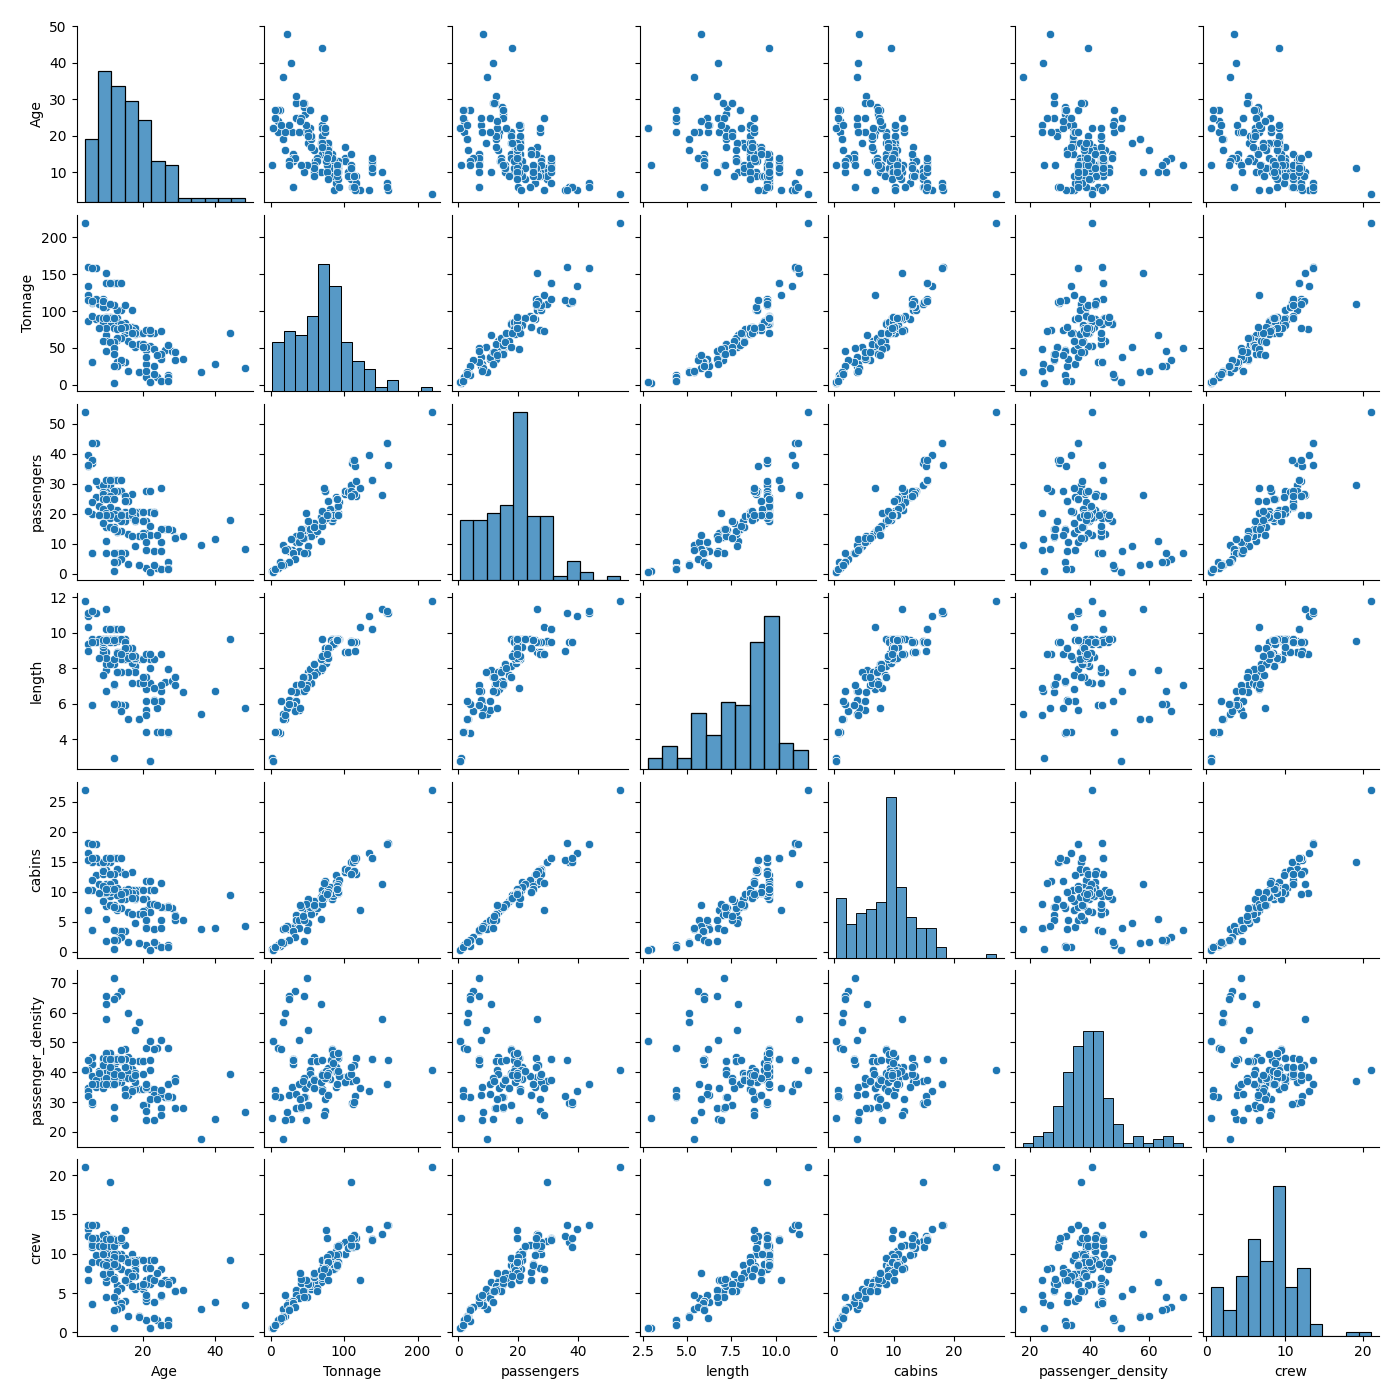

In [34]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
sns.pairplot(cruise[cols], size=2.0)

Observations
- The dataset consists of 9 columns, 2 categorical, the rest numerical (int -age and the rest floats).
- There are no NaN values across the dataset
- In the entire dataset, the maximum age for the crew members is 48, the minimum age is 4, and the mean is 15.68
- In the entire dataset, the maximum age for the crew members is 48, the minimum age is 4, and the mean is 15.68
- There is a correlation between the target variable (crew) and Tonnage, passengers, length, and cabins 